In [3]:

import numpy as np
import random

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab


sens = []
pos_pred = []

n = 0
j = 0 

while j < 1:
    
    S = ''
    R = ''

    fair = [1,2,3,4,5,6]
    loaded = [1,2,3,4,5,6,6,6,6,6]

#i = 0

    trans_mat = [[0.5, 0.5], [0.8, 0.2], [0.3, 0.7]]
    emis_mat = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]


    for i in range(200):
    
        if i == 0:
            num = random.random()
        
            if num < 0.5:
                S = S + "F"
                roll = random.choice(fair)
                R = R + str(roll)
            
            if num >= 0.5:
                S = S + "L"
                roll = random.choice(loaded)
                R = R + str(roll)
            
        if i != 0:
            num = random.random()
            if S[-1] == "F":
            
                if num < trans_mat[1][0]:
                    S = S + "F"
                    roll = random.choice(fair)
                    R = R + str(roll)
                
                if num >= trans_mat[1][0]:
                    S = S + "L"
                    roll = random.choice(loaded)
                    R = R + str(roll)
                
            else: 
               if num < trans_mat[2][0]:
                   S = S + "F"
                   roll = random.choice(fair)
                   R = R + str(roll)
                
               if num >= trans_mat[2][0]:
                   S = S + "L"
                   roll = random.choice(loaded)
                   R = R + str(roll)
                



    rolls = R


    vF = 0
    vL = 0

    Fdie = trans_mat[1]
    Ldie = trans_mat[2]

    F = emis_mat[0]
    L = emis_mat[1]

    die = 1

    vList = [[], []]

    ## step 1

    vList[0].append(die*trans_mat[0][0]*F[0])
    vList[1].append(die*trans_mat[0][1]*L[0])

    FLlist = [["0"], ["0"]]


## iterate over remaining values

    for i in rolls[1:]:
    
        FF = vList[0][-1]*Fdie[0]*F[int(i)-1]
        FL = vList[0][-1]*Fdie[1]*L[int(i)-1]
    
        LF = vList[1][-1]*Ldie[0]*F[int(i)-1]
        LL = vList[1][-1]*Ldie[1]*L[int(i)-1]
    
        if FF > LF:
            vList[0].append(FF)
            FLlist[0].append("F")
       
        if LF >= FF:
            vList[0].append(LF)
            FLlist[0].append("L")
        
        if FL > LL:
            vList[1].append(FL)
            FLlist[1].append("F")
        
        if LL >= FL:
            vList[1].append(LL)
            FLlist[1].append("L")
        

    guess = ''

    if vList[0][-1] >= vList[1][-1]:
        guess = "F" + guess
    
    if vList[1][-1] > vList[0][-1]:
        guess = "L" + guess
    
    for i in range(1,len(rolls)):
        if guess[0] == 'F':
            guess = str(FLlist[0][-i]) + guess
        
        #if guess[0] == 'L':
        else:
            guess = str(FLlist[1][-i]) + guess
        
        
    nL = S.count("L")
    nLG = guess.count("L")
    
    for i in range(len(rolls)):
        if S[i] == guess[i] and S[i] == "L":
            n = n+1
            
    if nL != 0:      
        sens.append(n/nL)
    
    else:
        sens.append(100)
        
    if nLG != 0:
        pos_pred.append(n/nLG)
    else:
        pos_pred.append(100)
            
            
#     print("Guess = ", guess)
#     print("Actual = ", S)
#     print("-----------------------------------")

        
    n = 0
    
    j = j+1

numbins = 20
pos_freq = [0] * numbins

NAP = 0

for num in pos_pred:
    if num == 100:
        NAP = NAP + 1
    if num != 1 and num != 100:
        pos_freq[int(np.floor(numbins*num))] = pos_freq[int(np.floor(numbins*num))] + 1
    if num == 1:
        pos_freq[numbins-1] = pos_freq[numbins-1] + 1
    
print(pos_freq, NAP)

sens_freq = [0] * numbins

NAS = 0

for num in sens:
    if num == 100:
        NAS = NAS +1
    if num != 1 and num != 100:
        sens_freq[int(np.floor(numbins*num))] = sens_freq[int(np.floor(numbins*num))] + 1
    if num == 1:
        sens_freq[numbins-1] = sens_freq[numbins-1] + 1
    
print(sens_freq, NAS)

[0, 0, 0, 1, 1, 3, 0, 6, 12, 11, 50, 86, 163, 186, 193, 156, 83, 33, 9, 7] 0
[0, 4, 10, 21, 39, 76, 96, 182, 172, 158, 112, 76, 34, 16, 4, 0, 0, 0, 0, 0] 0


In [12]:
#print(pos_pred)
#print(sens)

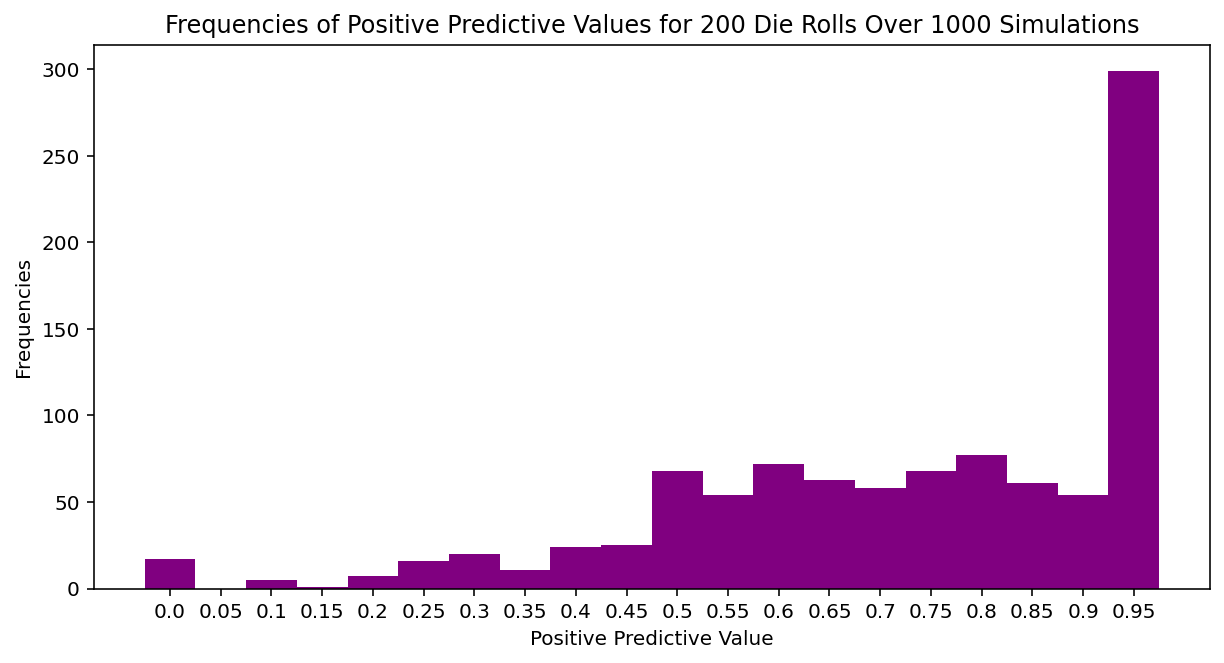

In [23]:
xAxis = [str(round(1.0/numbins*i, 2)) for i in range(0, numbins)]

fig1 = plt.figure(figsize = (10, 5))
plt.bar(xAxis, pos_freq, color ='purple', 
        width = 1)
 
plt.xlabel("Positive Predictive Value")
plt.ylabel("Frequencies")
plt.title("Frequencies of Positive Predictive Values for 200 Die Rolls Over 1000 Simulations")
plt.show()

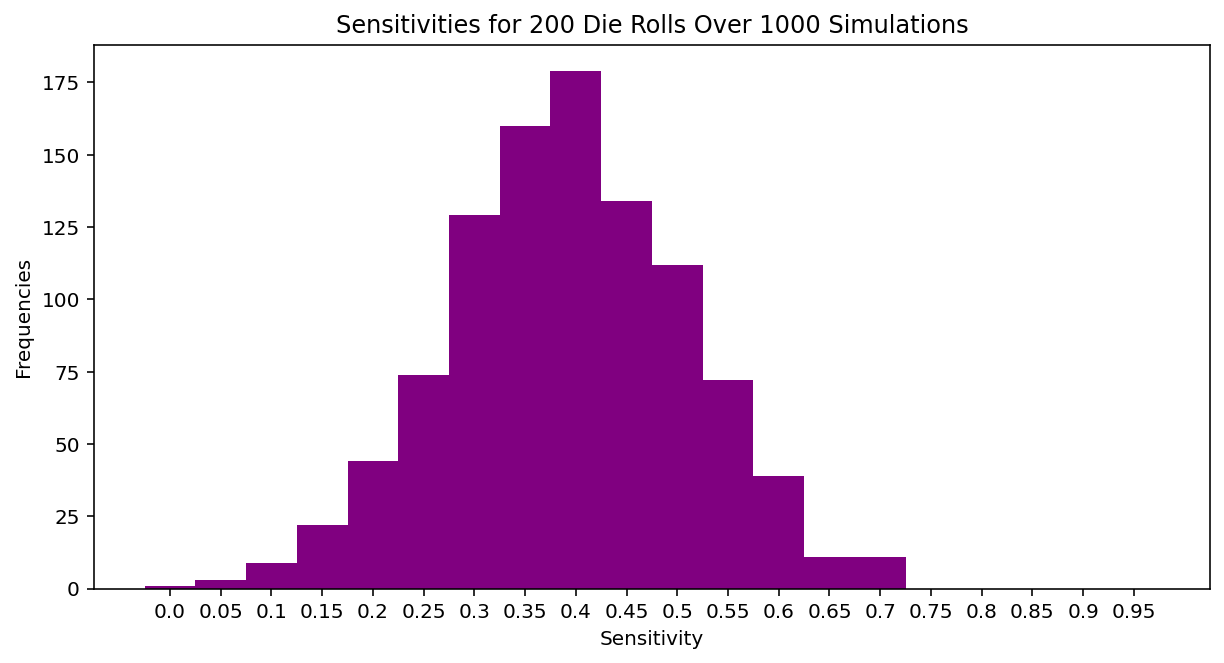

In [14]:
xAxis = [str(round(1.0/numbins*i, 2)) for i in range(0, numbins)]

fig2 = plt.figure(figsize = (10, 5))
plt.bar(xAxis, sens_freq, color ='purple', 
        width = 1)
 
plt.xlabel("Sensitivity")
plt.ylabel("Frequencies")
plt.title("Sensitivities for 200 Die Rolls Over 1000 Simulations")
plt.show()